In [ ]:
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scikitplot as skplt

In [ ]:
plt.style.use('ggplot')

In [ ]:
dados = pd.read_csv("/content/WineQT.csv")
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
dados.shape

(1143, 13)

In [ ]:
dados['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Fixed Acidity", "Volatile Acidity", "Residual Sugar", "Chlorides"))

fig.add_trace(
    go.Histogram(x=dados['fixed acidity']),
    row=1, col=1,
)

fig.add_trace(
    go.Histogram(x=dados['volatile acidity']),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=dados['residual sugar']),
    row=2, col=1
)

fig.add_trace(
    go.Histogram(x=dados['chlorides']),
    row=2, col=2
)

fig.update_layout(height=600, width=1000, title_text="Histogramas para visualizar a amplitude de cada coluna", showlegend=False)
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("free sulfur dioxide", "total sulfur dioxide", "density", "pH"))

fig.add_trace(
    go.Histogram(x=dados['free sulfur dioxide']),
    row=1, col=1,
)

fig.add_trace(
    go.Histogram(x=dados['total sulfur dioxide']),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x=dados['density']),
    row=2, col=1
)

fig.add_trace(
    go.Histogram(x=dados['pH']),
    row=2, col=2
)

fig.update_layout(height=600, width=1000, title_text="Histogramas para visualizar a amplitude de cada coluna", showlegend=False)
fig.show()

In [ ]:
def transformar_classe(valor):
  if valor <= 5:
    return 0
  else:
    return 1

In [ ]:
dados['quality'] = dados['quality'].map(transformar_classe)
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4


In [ ]:
x = dados[['fixed acidity', 'fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = dados['quality'].values

print(x.shape)
print(y.shape)

(1143, 11)
(1143,)


In [ ]:
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)

print(x_norm[0:5])

[[0.24778761 0.24778761 0.         0.06849315 0.10684474 0.14925373
  0.09893993 0.56754772 0.60629921 0.13772455 0.15384615]
 [0.28318584 0.28318584 0.         0.11643836 0.14357262 0.35820896
  0.2155477  0.49412628 0.36220472 0.20958084 0.21538462]
 [0.28318584 0.28318584 0.04       0.09589041 0.13355593 0.20895522
  0.16961131 0.50881057 0.40944882 0.19161677 0.21538462]
 [0.5840708  0.5840708  0.56       0.06849315 0.10517529 0.23880597
  0.19081272 0.58223201 0.33070866 0.1497006  0.21538462]
 [0.24778761 0.24778761 0.         0.06849315 0.10684474 0.14925373
  0.09893993 0.56754772 0.60629921 0.13772455 0.15384615]]


In [ ]:
print(y[0:5])

[0 0 0 1 0]


In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_norm, y, test_size=0.3, random_state=0)

print("Treino: ", x_treino.shape)
print("Teste: ", x_teste.shape)

Treino:  (800, 11)
Teste:  (343, 11)


#Random Forest

In [ ]:
param_grid = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

scoring = {"ACC": "accuracy", 'AUC':'roc_auc'}

random_CV = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring=scoring, refit='AUC')

random_CV.fit(x_treino, y_treino)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   refit='AUC', scoring={'ACC': 'accuracy', 'AUC': 'roc_auc'})

In [ ]:
random_CV.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1600}

In [ ]:
random_CV.best_score_

0.8481376262626263

In [ ]:
previsao = random_CV.predict(x_teste)
acuracia = accuracy_score(y_teste, previsao)
print("Accuracy: ", acuracia)

Accuracy:  0.7813411078717201


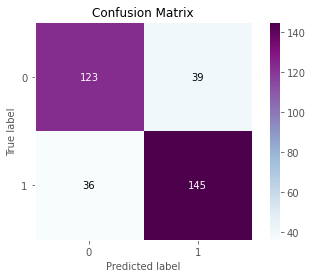

In [ ]:
skplt.metrics.plot_confusion_matrix(y_teste, previsao, cmap="BuPu")

In [ ]:
proba = random_CV.predict_proba(x_teste)
print("AUC", roc_auc_score(y_teste, proba[:,1]))

AUC 0.8757929199918151


#KNN

In [ ]:
param_grid = {
    'n_neighbors': [int(x) for x in np.linspace(start = 1, stop = 100, num = 50)],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan','chebyshev', 'minkowski'],
}

scoring = {"ACC": "accuracy", 'AUC':'roc_auc'}

knn_CV = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring=scoring, refit='AUC')

knn_CV.fit(x_treino, y_treino)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'chebyshev', 'minkowski'],
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19, 21, 23, 25,
                                                        27, 29, 31, 33, 35, 37,
                                                        39, 41, 43, 45, 47, 49,
                                                        51, 53, 55, 57, 59, ...],
                                        'weights': ['uniform', 'distance']},
                   refit='AUC', scoring={'ACC': 'accuracy', 'AUC': 'roc_auc'})

In [ ]:
knn_CV.best_params_

{'metric': 'minkowski', 'n_neighbors': 89, 'weights': 'distance'}

In [ ]:
knn_CV.best_score_

0.8417929292929294

In [ ]:
previsao_knn = knn_CV.predict(x_teste)
acuracia_knn = accuracy_score(y_teste, previsao_knn)
print("Accuracy: ", acuracia_knn)

Accuracy:  0.7900874635568513


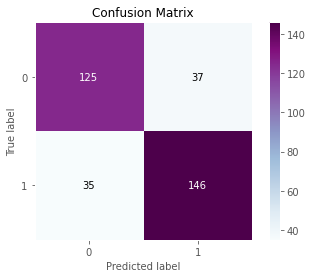

In [ ]:
skplt.metrics.plot_confusion_matrix(y_teste, previsao_knn, cmap="BuPu")

In [ ]:
proba_knn = knn_CV.predict_proba(x_teste)

In [ ]:
print("AUC", roc_auc_score(y_teste, proba_knn[:,1]))

AUC 0.8848646067798922


#Gráficos de comparação

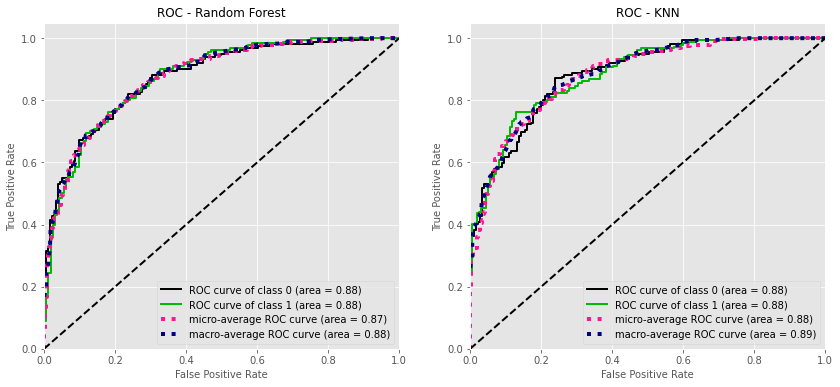

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))
skplt.metrics.plot_roc(y_teste, proba, ax=axs[0], title="ROC - Random Forest")
skplt.metrics.plot_roc(y_teste, proba_knn, ax=axs[1], title="ROC - KNN")
plt.show()

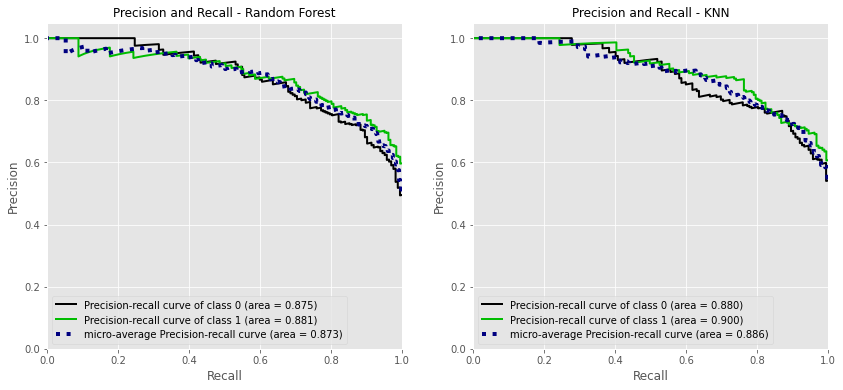

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))
skplt.metrics.plot_precision_recall(y_teste, proba, ax=axs[0], title="Precision and Recall - Random Forest")
skplt.metrics.plot_precision_recall(y_teste, proba_knn, ax=axs[1], title="Precision and Recall - KNN")
plt.show()

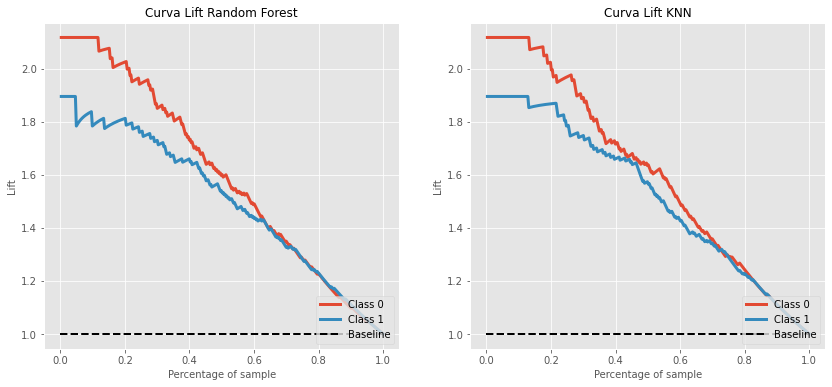

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))
skplt.metrics.plot_lift_curve(y_teste, proba, ax=axs[0], title="Curva Lift Random Forest")
skplt.metrics.plot_lift_curve(y_teste, proba_knn, ax=axs[1], title="Curva Lift KNN")
plt.show()

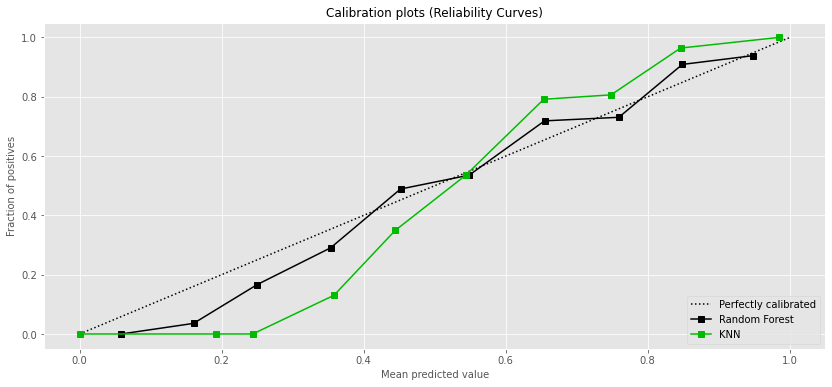

In [ ]:
probas_list = [proba, proba_knn]
modelos = ['Random Forest', 'KNN']

skplt.metrics.plot_calibration_curve(y_teste, probas_list, modelos, figsize=(14,6))
plt.grid(True)
plt.show()